### Question 1

#### 1.1 Pseudocode:
    function sample_dist:  
        sample = uniformdistribution.sample()  
        if sample is >= 0 and sample < 0.20: 
            return "Movies" 
        elif sample is >= 0.20 and sample < 0.6:
            return "COMP-551"
        elif sample is >= 0.60 and sample < 0.7:
            return "Playing"
        else
            return "Studying"

#### 1.2 Code:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib import colors
import matplotlib
from matplotlib.ticker import PercentFormatter

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)

In [3]:
def sample():
    sample = np.random.uniform()
    if sample >= 0.0 and sample < 0.20:
        return "Movies"
    elif sample >= 0.20 and sample < 0.6:
        return "COMP-551"
    elif sample >= 0.60 and sample < 0.7:
        return "Playing"
    else:
        return "Studying"
    
def sample_n_times(n):
    output = {'Movies': 0, 'COMP-551': 0, "Playing": 0, "Studying": 0}
    for i in range(0, n):
        output[sample()] += 1
        
    return output

In [4]:
def print_fraction(args):
    vals = args.values()
    total = sum(vals)
    print("Fraction of days of activites for ", total, " days: ")
    print("\t Movies: ", args["Movies"]/total)
    print("\t COMP-551: ", args["COMP-551"]/total)
    print("\t Playing: ", args["Playing"]/total)
    print("\t Studying: ", args["Studying"]/total)
    print("\n")

In [5]:
print_fraction(sample_n_times(100))
print_fraction(sample_n_times(1000))
print_fraction(sample_n_times(100000))

Fraction of days of activites for  100  days: 
	 Movies:  0.23
	 COMP-551:  0.43
	 Playing:  0.06
	 Studying:  0.28


Fraction of days of activites for  1000  days: 
	 Movies:  0.214
	 COMP-551:  0.391
	 Playing:  0.121
	 Studying:  0.274


Fraction of days of activites for  100000  days: 
	 Movies:  0.19993
	 COMP-551:  0.4011
	 Playing:  0.09719
	 Studying:  0.30178




As the number of samples increase, the fraction of the values more closely resembles the underlying multinomial distribution. This can be seen by taking 1 000 000 samples:

In [6]:
print_fraction(sample_n_times(1000000))

Fraction of days of activites for  1000000  days: 
	 Movies:  0.199337
	 COMP-551:  0.400569
	 Playing:  0.100197
	 Studying:  0.299897




### Question 2
#### 2.1:

In [7]:
from numpy import matmul
from numpy.linalg import inv

In [8]:
def get_x_y(dataset_type, dataset_number):
    x = []
    y = []
    if dataset_type != "train" and\
    dataset_type != "valid" and\
    dataset_type != "test":
        return (0, 0)
    
    if dataset_number != 1 and\
    dataset_number != 2:
        return (0, 0)
    with open ("Datasets/Dataset_" + str(dataset_number) + "_" + dataset_type + ".csv") as f:
        for line in f:
            split = line.split(',')
            x += [float(split[0])]
            y += [float(split[1])]
    return (x, y)

In [9]:
def generate_weights(x, y):
    x_matrix = np.array([[x[j]**i for i in range(0, 21)] for j in range(0, 50)])
    y_matrix = np.array(y)
    x_matrix_T = np.matrix.transpose(np.copy(x_matrix))
    w_matrix = matmul(matmul(inv(matmul(x_matrix_T,x_matrix)),x_matrix_T),y_matrix)
    return w_matrix

In [10]:
x_train, y_train = get_x_y("train", 1)
x_valid, y_valid = get_x_y("valid", 1)

In [11]:
w_train = generate_weights(x_train, y_train)

In [12]:
function = np.poly1d(np.flip(w_train, 0)) 

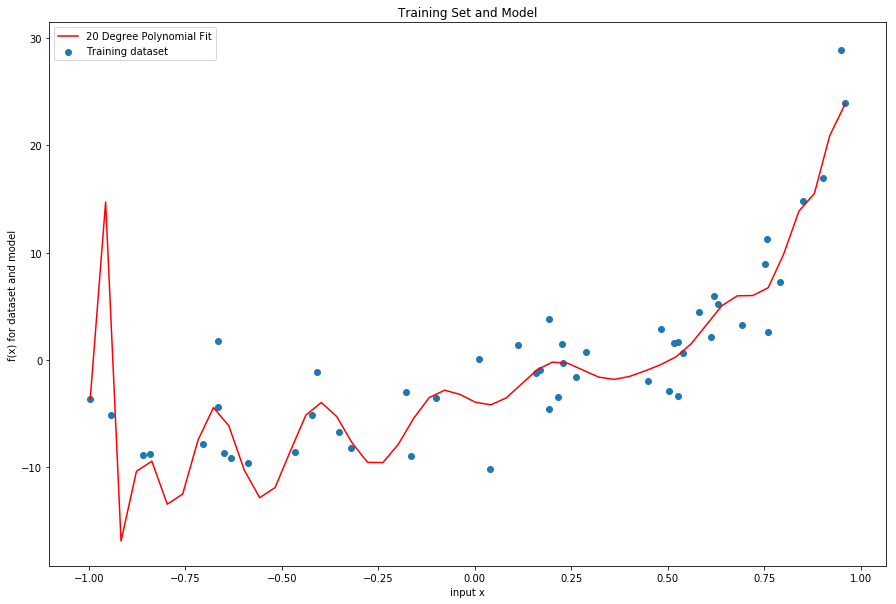

In [13]:
x_axis = np.linspace(min(x_train), max(x_train))
plt.plot(x_axis, function(x_axis), 'r', label="20 Degree Polynomial Fit")
plt.xlabel("input x")
plt.ylabel("f(x) for dataset and model")
plt.title("Training Set and Model")
plt.scatter(x_train, y_train, label="Training dataset")
plt.legend(loc="upper left")
plt.show()

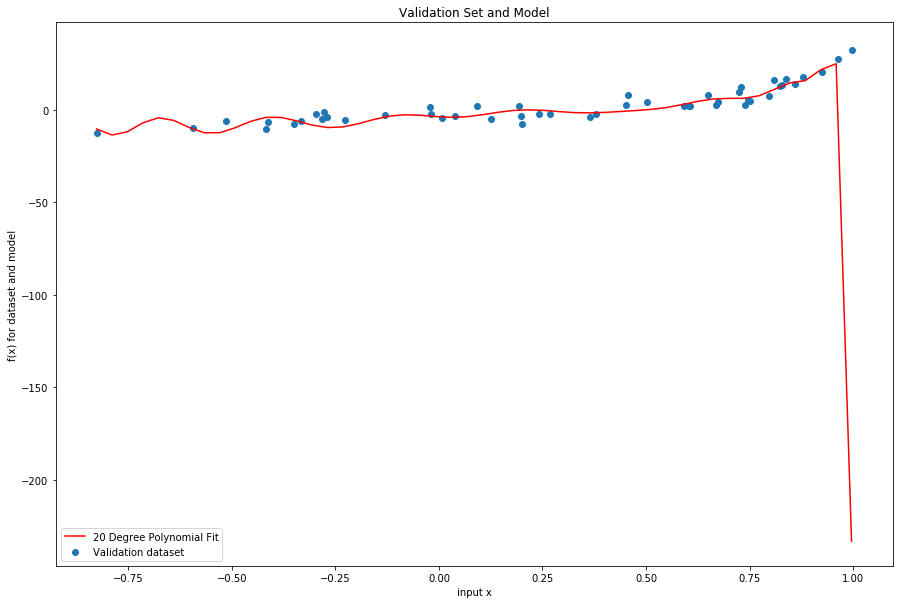

In [14]:
x_axis = np.linspace(min(x_valid), max(x_valid))
plt.plot(x_axis, function(x_axis), 'r', label="20 Degree Polynomial Fit")
plt.scatter(x_valid, y_valid, label="Validation dataset")
plt.legend(loc="lower left")
plt.xlabel("input x")
plt.ylabel("f(x) for dataset and model")
plt.title("Validation Set and Model")
plt.show()

Using same xaxis for both:

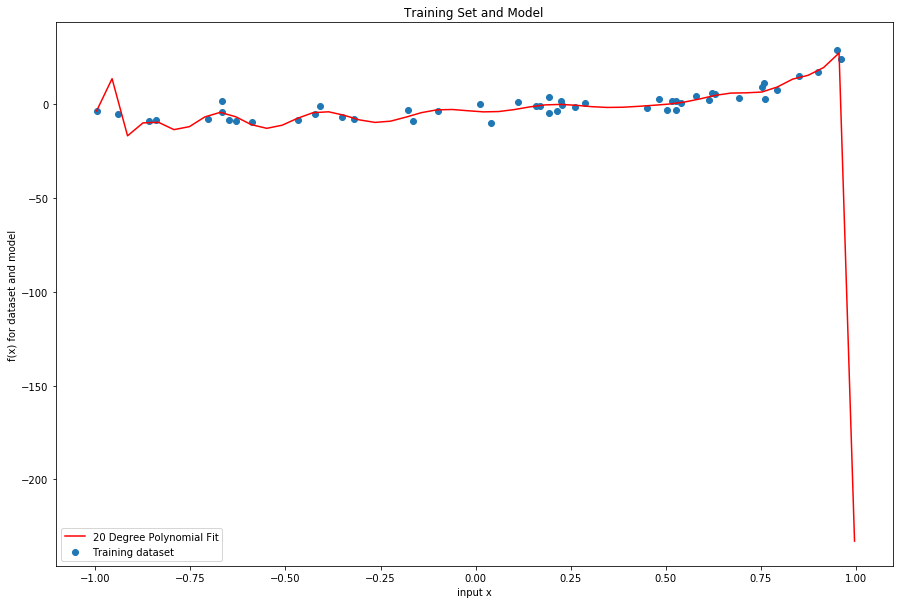

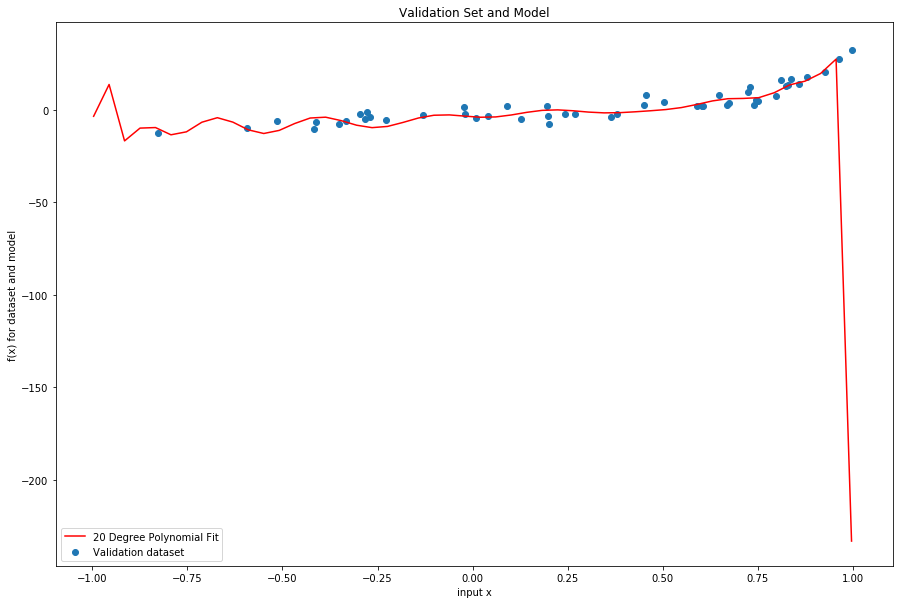

In [15]:
low = min(min(x_valid), min(x_train))
high = max(max(x_valid), max(x_train))

x_axis = np.linspace(low, high)
plt.plot(x_axis, function(x_axis), 'r', label="20 Degree Polynomial Fit")
plt.xlabel("input x")
plt.ylabel("f(x) for dataset and model")
plt.title("Training Set and Model")
plt.scatter(x_train, y_train, label="Training dataset")
plt.legend(loc="lower left")
plt.show()
plt.plot(x_axis, function(x_axis), 'r', label="20 Degree Polynomial Fit")
plt.scatter(x_valid, y_valid, label="Validation dataset")
plt.legend(loc="lower left")
plt.xlabel("input x")
plt.ylabel("f(x) for dataset and model")
plt.title("Validation Set and Model")
plt.show()

In [16]:
def mse(x, y, func):
    y_output = func(x)
    return np.mean((np.array(y_output) - np.array(y))**2)

In [17]:
print("Training MSE: ", mse(x_train, y_train, function))
print("Validation MSE: ", mse(x_valid, y_valid, function))

Training MSE:  6.474752010417034
Validation MSE:  1421.1629498680581


In [18]:
def generate_regularized_weights(x, y, l):
    x_matrix = np.array([[x[j]**i for i in range(0, 21)] for j in range(0, 50)])
    y_matrix = np.array(y)
    x_matrix_T = np.matrix.transpose(np.copy(x_matrix))
    w_matrix = matmul(matmul(inv(matmul(x_matrix_T,x_matrix) + l*np.eye(21)),x_matrix_T),y_matrix)
    return w_matrix

#### 2.2:

In [19]:
lambda_vals = np.linspace(0, 1, 100)
mse_train = []
mse_valid = []
for l in lambda_vals:
    w_matrix = generate_regularized_weights(x_train, y_train, l)
    function = np.poly1d(np.flip(w_matrix, 0))
    mse_train += [mse(x_train, y_train, function)]
    mse_valid += [mse(x_valid, y_valid, function)]

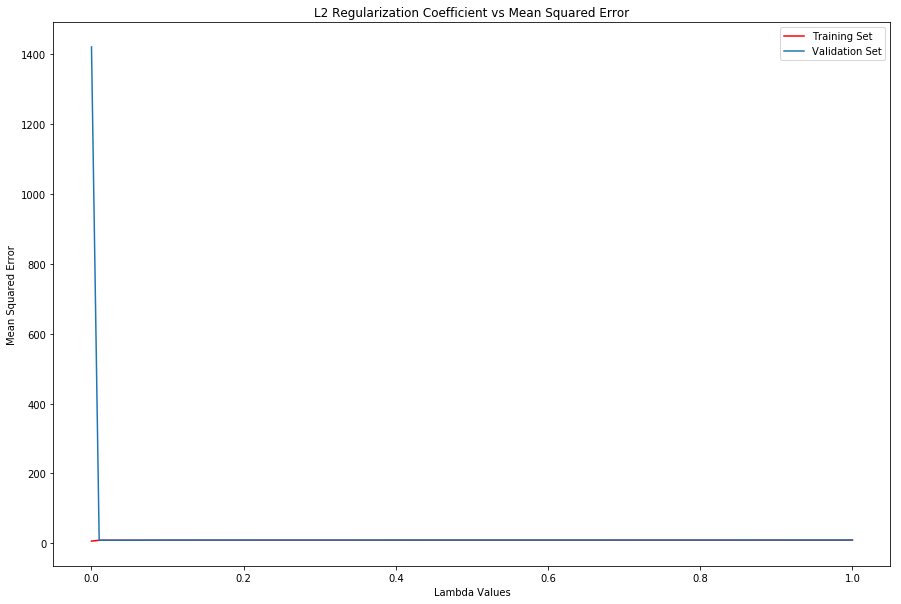

In [20]:
plt.plot(lambda_vals, mse_train, 'r', label="Training Set")
plt.xlabel("Lambda Values")
plt.ylabel("Mean Squared Error")
plt.title("L2 Regularization Coefficient vs Mean Squared Error")
plt.plot(lambda_vals, mse_valid, label="Validation Set")
plt.legend(loc="upper right")
plt.show()

Normalizing by removing outlier values:

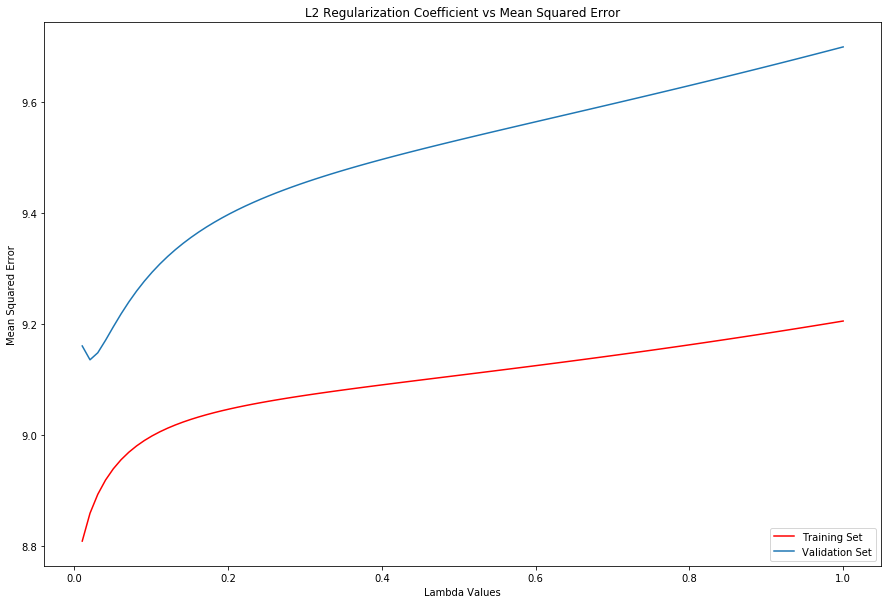

In [21]:
plt.plot(lambda_vals[1:], mse_train[1:], 'r', label="Training Set")
plt.xlabel("Lambda Values")
plt.ylabel("Mean Squared Error")
plt.title("L2 Regularization Coefficient vs Mean Squared Error")
plt.plot(lambda_vals[1:], mse_valid[1:], label="Validation Set")
plt.legend(loc="lower right")
plt.show()

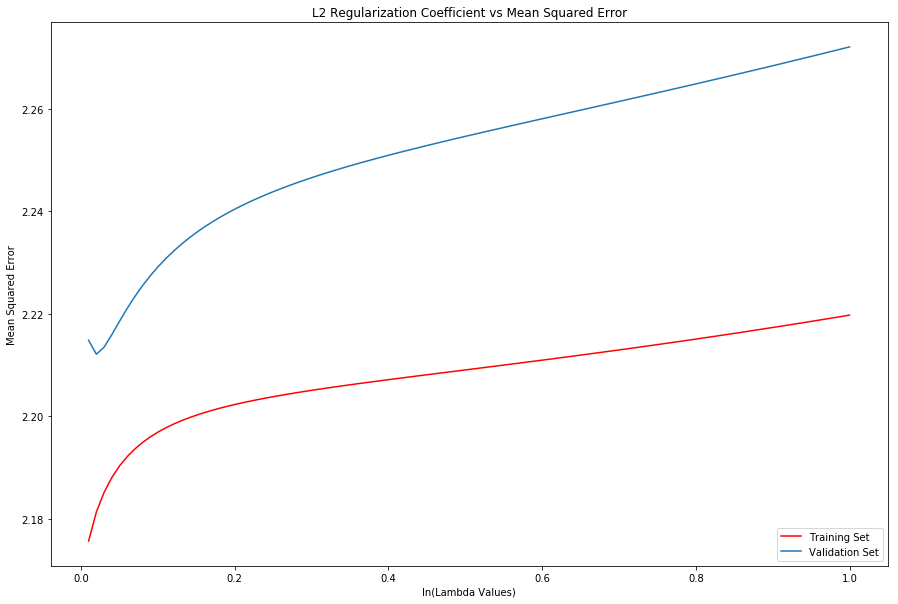

In [22]:
plt.plot(lambda_vals[1:], np.log(mse_train[1:]), 'r', label="Training Set")
plt.xlabel("ln(Lambda Values)")
plt.ylabel("Mean Squared Error")
plt.title("L2 Regularization Coefficient vs Mean Squared Error")
plt.plot(lambda_vals[1:], np.log(mse_valid[1:]), label="Validation Set")
plt.legend(loc="lower right")
plt.show()

We choose a value of lambda such that both the training set and validation set are at their minimums:

In [23]:
mse_train[2]

8.85845748921518

In [24]:
mse_valid.index(min(mse_valid)), mse_train.index(min(mse_train))

(2, 0)

We choose the lambda value to be at index two to account minimize both functions:

In [25]:
lambda_best = lambda_vals[2]
print("Best lambda = ", lambda_vals[2])

Best lambda =  0.020202020202020204


In [26]:
w_optimal = generate_regularized_weights(x_train, y_train, lambda_best)

In [27]:
function = np.poly1d(np.flip(w_optimal, 0))

In [28]:
print(function)

         20         19          18         17         16         15
-0.6575 x  - 2.547 x  + 0.5428 x  - 2.208 x  + 1.451 x  - 1.375 x 
          14           13        12         11         10         9
 + 1.947 x  + 0.07243 x  + 1.98 x  + 2.205 x  + 1.732 x  + 4.912 x
          8         7         6         5         4         3
 + 1.839 x + 7.491 x + 3.365 x + 7.089 x + 5.782 x - 5.421 x
           2
 + 0.6162 x + 8.166 x - 3.189


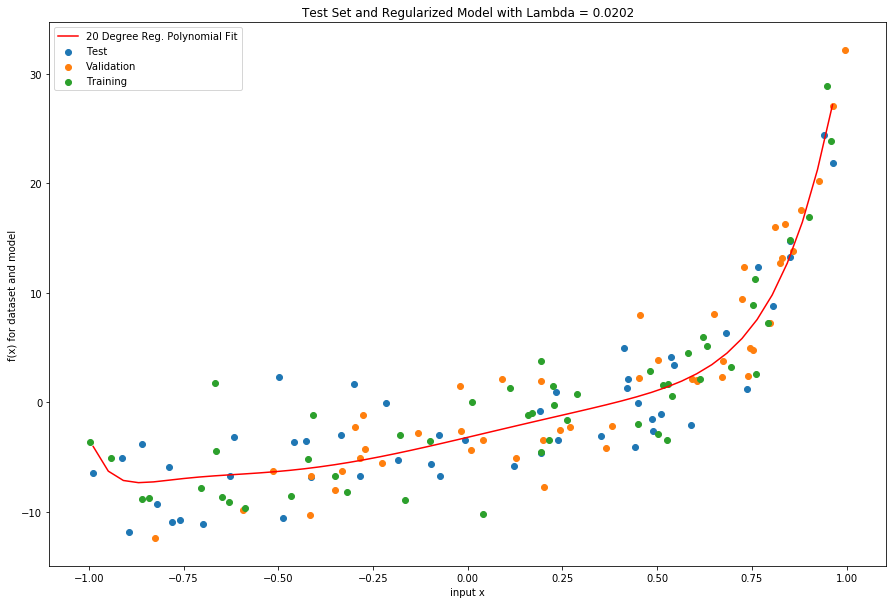

In [29]:
x_test, y_test = get_x_y("test", 1)
x_axis = np.linspace(min(x_test), max(x_test))
plt.plot(x_axis, function(x_axis), 'r', label="20 Degree Reg. Polynomial Fit")
plt.xlabel("input x")
plt.ylabel("f(x) for dataset and model")
plt.title("Test Set and Regularized Model with Lambda = 0.0202")
plt.scatter(x_test, y_test, label="Test")
plt.scatter(x_valid, y_valid, label="Validation")
plt.scatter(x_train, y_train, label="Training")
plt.legend(loc="upper left")
plt.show()

In [30]:
print("Regularized model with lambda =",round(lambda_best, 3), "with MSE:", mse(x_test, y_test, function))

Regularized model with lambda = 0.02 with MSE: 10.72883389566123


### Question 3

In [31]:
import random
x_train_org, y_train_org = get_x_y("train", 2)
x_valid_org, y_valid_org = get_x_y("valid", 2)

def shuffle(x, y):
    c = list(zip(x_train_org, y_train_org))
    random.shuffle(c)
    return zip(*c)

In [48]:
def sgd(step_size=1e-6, sat_point=1e-6, max_iterations=50000):
    x_train_org, y_train_org = get_x_y("valid", 2)
    x_values_valid, y_values_valid = get_x_y("valid", 2)
    w = np.array([0.0, 0.0])
    w_prev = np.array([float('-inf'), float('-inf')])
    sgd_function = np.poly1d(w)
    train_mse = []
    valid_mse = []
    periodic_weights = []
    for j in range(max_iterations):
        w_prev = [w[0], w[1]]
        x_values_train, y_values_train = shuffle(x_train_org, y_train_org)
        for i in range(len(x_values_train)):
            x_val, y_val = x_values_train[i], y_values_train[i]
            w[0] = w[0] - step_size * ((w[0] + w[1]*x_values_train[i]) - y_val)
            w[1] = w[1] - step_size * ((w[0] + w[1]*x_values_train[i]) - y_val) * x_val

        if np.linalg.norm(w - w_prev) < sat_point:
            break
        
        if j in [0, 10, 50, 500, 800, 1000]:
            periodic_weights.append((j, [k for k in w]))
        
        train_mse.append(mse(x_values_train, y_values_train, np.poly1d(w[::-1])))
        valid_mse.append(mse(x_values_valid, y_values_valid, np.poly1d(w[::-1])))
    return train_mse, valid_mse, w, periodic_weights

In [49]:
import time

In [51]:
start = time.time()
train_mse, valid_mse, w, per_weights = sgd()
end = time.time()
print(end - start)

76.36770248413086


In [52]:
len(valid_mse)

50000

Plotting the learning curve for training and validation MSE:

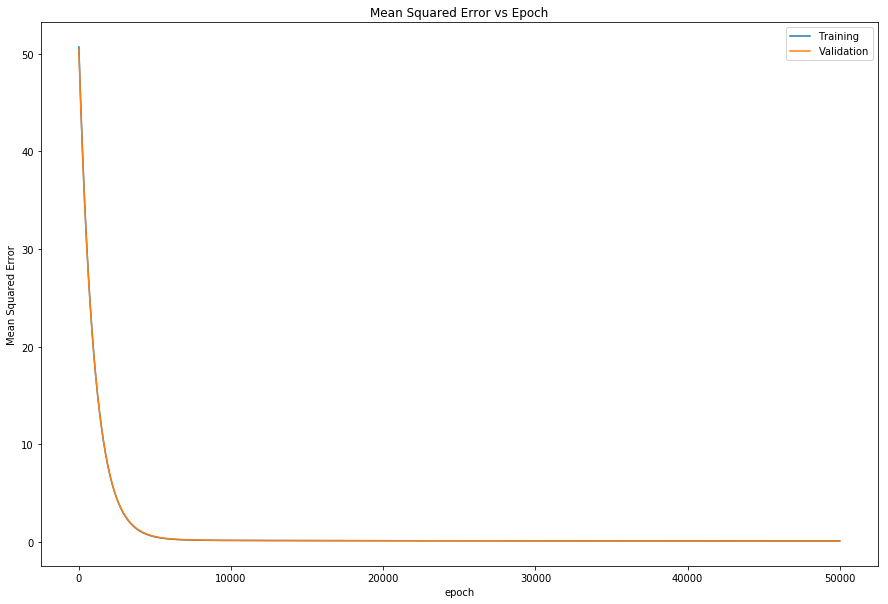

In [53]:
x_axis = np.arange(0, len(train_mse))
plt.plot(x_axis, train_mse, label="Training")
plt.plot(x_axis, valid_mse, label="Validation")
plt.xlabel("epoch")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error vs Epoch")
plt.legend(loc="upper right")
plt.show()

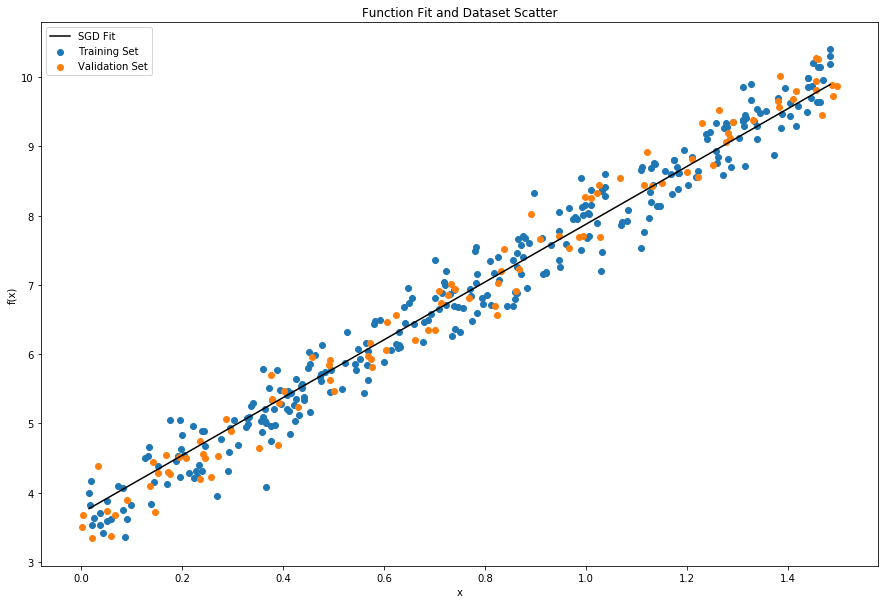

In [54]:
x_axis = np.arange(0, len(train_mse))
func = np.poly1d(w[::-1])
x_axis = np.linspace(min(x_train_org), max(x_train_org))
plt.plot(x_axis, func(x_axis), label="SGD Fit", color="black")
plt.scatter(x_train_org, y_train_org, label="Training Set")
plt.scatter(x_valid_org, y_valid_org, label="Validation Set")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Function Fit and Dataset Scatter")
plt.legend(loc="upper left")
plt.show()

To find optimal step size, we fix the saturation value, and optimize for lowest MSE achiveved with the lowest number of iterations:

In [55]:
step_size = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

In [56]:
times = []
all_mse = []
iterations = []
for step in step_size:
    start = time.time()
    train_mse, valid_mse, w, w_periodic = sgd(step_size=step)
    end = time.time()
    times.append(end - start)
    all_mse.append(valid_mse)
    iterations.append(len(valid_mse))
    print(end - start)

80.47695779800415
74.3743543624878
74.66424465179443
73.14019656181335
26.07871651649475
3.7156124114990234
14.175394296646118
84.38293790817261
82.14332151412964


In [57]:
list(zip(step_size, [i[-1] for i in all_mse if len(i) > 0]))

[(1e-09, 47.97569115805251),
 (1e-08, 30.798490273120766),
 (1e-07, 0.5497662497557377),
 (1e-06, 0.08417351095645845),
 (1e-05, 0.07415255079596074),
 (0.0001, 0.07408070132798991),
 (0.001, 0.07412419159284651),
 (0.01, 0.07655188761880437),
 (0.1, 0.07531722310365624)]

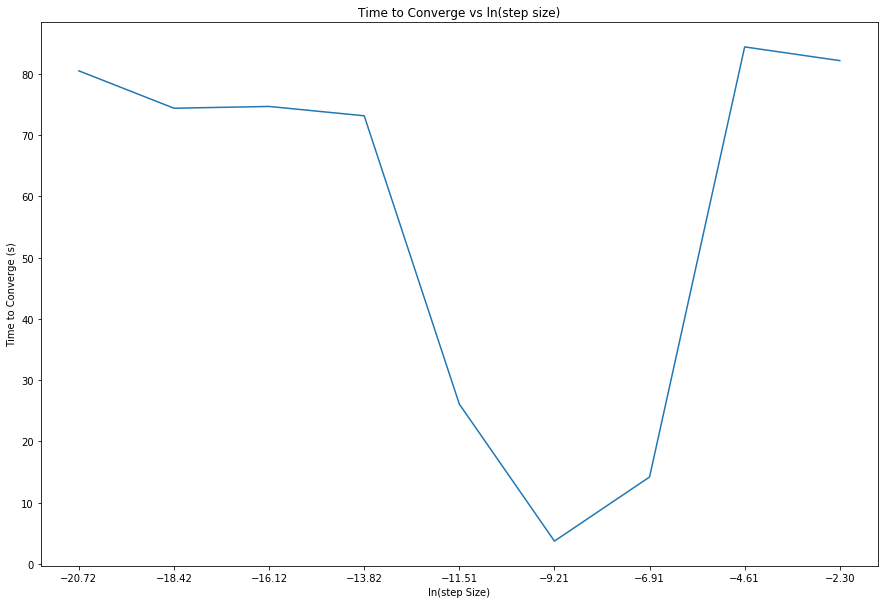

In [58]:
plt.plot(np.log(step_size), times, label="Time to fit (s)")
# plt.plot(step_size, iterations, label="Number of Iterations Before Convergence")
# plt.plot(step_size, [min(i) for i in all_mse], label="Minimum MSE after Convergence")
plt.xlabel("ln(step Size)")
plt.ylabel("Time to Converge (s)")
plt.xticks(np.log(step_size))
# plt.axis(xmin=1e-9, xmax=1e-1)
plt.title("Time to Converge vs ln(step size)")
# plt.legend(loc="upper right")
plt.show()

From this we can start to see that as we approach a step size of 1e-5 and 1e-4 our time to converge is reduced drastically, we will now compare the final MSEs for each and try to pick one that gives the best MSE performance on the validation set:

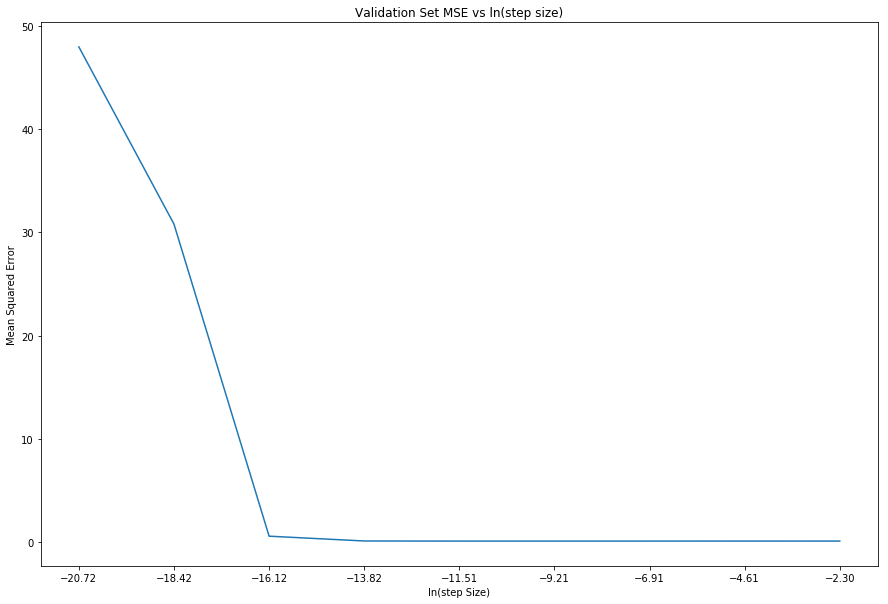

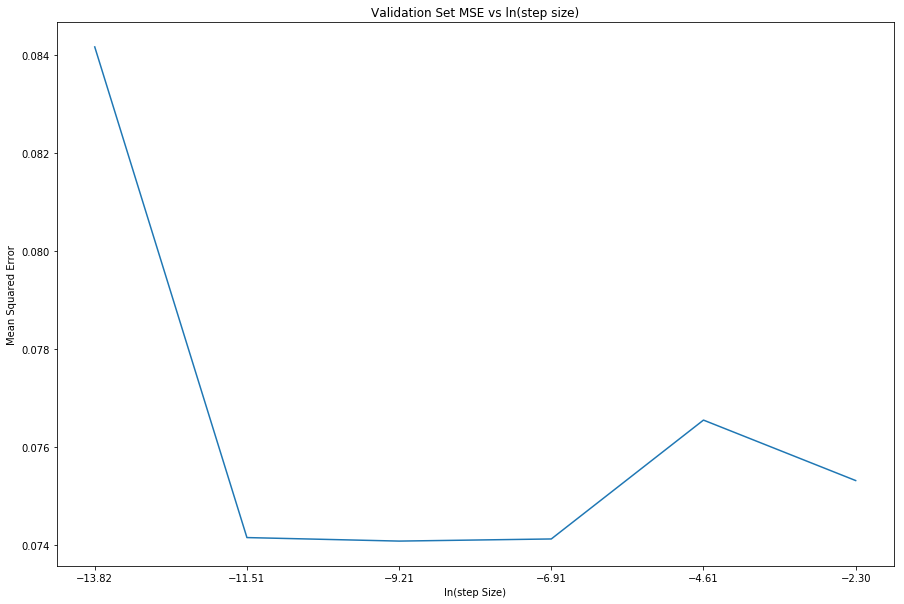

In [59]:
y = [i[-1] for i in all_mse if len(i) > 0]
plt.plot(np.log(step_size), y, label="Time to fit (s)")
# plt.plot(step_size, iterations, label="Number of Iterations Before Convergence")
# plt.plot(step_size, [min(i) for i in all_mse], label="Minimum MSE after Convergence")
plt.xlabel("ln(step Size)")
plt.ylabel("Mean Squared Error")
plt.xticks(np.log(step_size))
# plt.axis(xmin=1e-9, xmax=1e-1)
plt.title("Validation Set MSE vs ln(step size)")
# plt.legend(loc="upper right")
plt.show()

plt.plot(np.log(step_size[3:]), [i[-1] for i in all_mse[3:]], label="Time to fit (s)")
# plt.plot(step_size, iterations, label="Number of Iterations Before Convergence")
# plt.plot(step_size, [min(i) for i in all_mse], label="Minimum MSE after Convergence")
plt.xlabel("ln(step Size)")
plt.ylabel("Mean Squared Error")
plt.xticks(np.log(step_size[3:]))
# plt.axis(xmin=1e-9, xmax=1e-1)
plt.title("Validation Set MSE vs ln(step size)")
# plt.legend(loc="upper right")
plt.show()

|Step Size|Final MSE|Time to Converge (s)|# of Iterations|
|:-------:|:---:|:---:|:---:|
| 1e-9 |47.98|100.29|50000|
| 1e-8 |30.80|87.54|50000|
|1e-7|0.5498|93.84|50000|
|1e-6|0.08417|94.78|50000|
|1e-5|0.07415|29.42|18130|
|1e-4|0.07408|4.39|2569|
|1e-3|0.07415|83.43|50000|
|1e-2|0.07554|84.63|50000|
|1e-1|0.08640|82.77|50000|

We can see that for 1e-5 and 1e-4, the MSE performance is virtually the same, so we will choose <b>1e-4</b> to be our most optimal step size as that allows for much quicker convergence

In [60]:
train_mse, valid_mse, w, periodic_weights = sgd(step_size=1e-4)
x_test, y_test = get_x_y("test", 2)
test_mse = mse(x_test, y_test, np.poly1d(w[::-1]))

Using a step size <b>1e-4</b> we fit our model and calculate our MSE with our test set to be:

In [61]:
print("Test set MSE: ", test_mse)

Test set MSE:  0.06922673080190181


In [62]:
len(valid_mse)
len(valid_mse)

2476

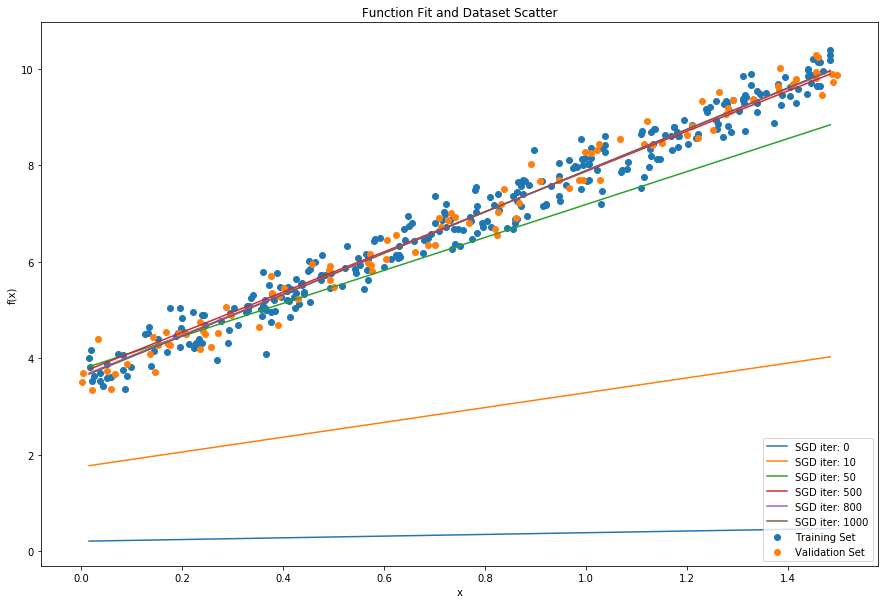

In [63]:
for i, per_w in periodic_weights:
    func = np.poly1d(per_w[::-1])
    x_axis = np.linspace(min(x_train_org), max(x_train_org))
    plt.plot(x_axis, func(x_axis), label="SGD iter: " + str(i))
plt.scatter(x_train_org, y_train_org, label="Training Set")
plt.scatter(x_valid_org, y_valid_org, label="Validation Set")
# plt.axis(ymin=0, ymax=12)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Function Fit and Dataset Scatter")
plt.legend(loc="lower right")
plt.show()